<a href="https://colab.research.google.com/github/Omethmee/CoureseWork-for-Machine-Learning/blob/main/2425451.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exploratory Data Analysis (EDA) and Preprocessing**

In [117]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [118]:
df = pd.read_csv("/content/drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [119]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [121]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [122]:
#axis = 1 means columns
df = df.drop(['gender','PaperlessBilling','PaymentMethod'], axis=1, errors='ignore')

In [123]:
df.head(5)

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,5575-GNVDE,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,3668-QPYBK,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,7795-CFOCW,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,9237-HQITU,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [124]:
#drop duplicates
df.shape

(7043, 18)

In [125]:
duplicate_rows = df[df.duplicated()]
print(duplicate_rows.shape)
#No duplicates

(0, 18)


In [126]:
#Missing values
df.isnull().sum()

,0
customerID,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


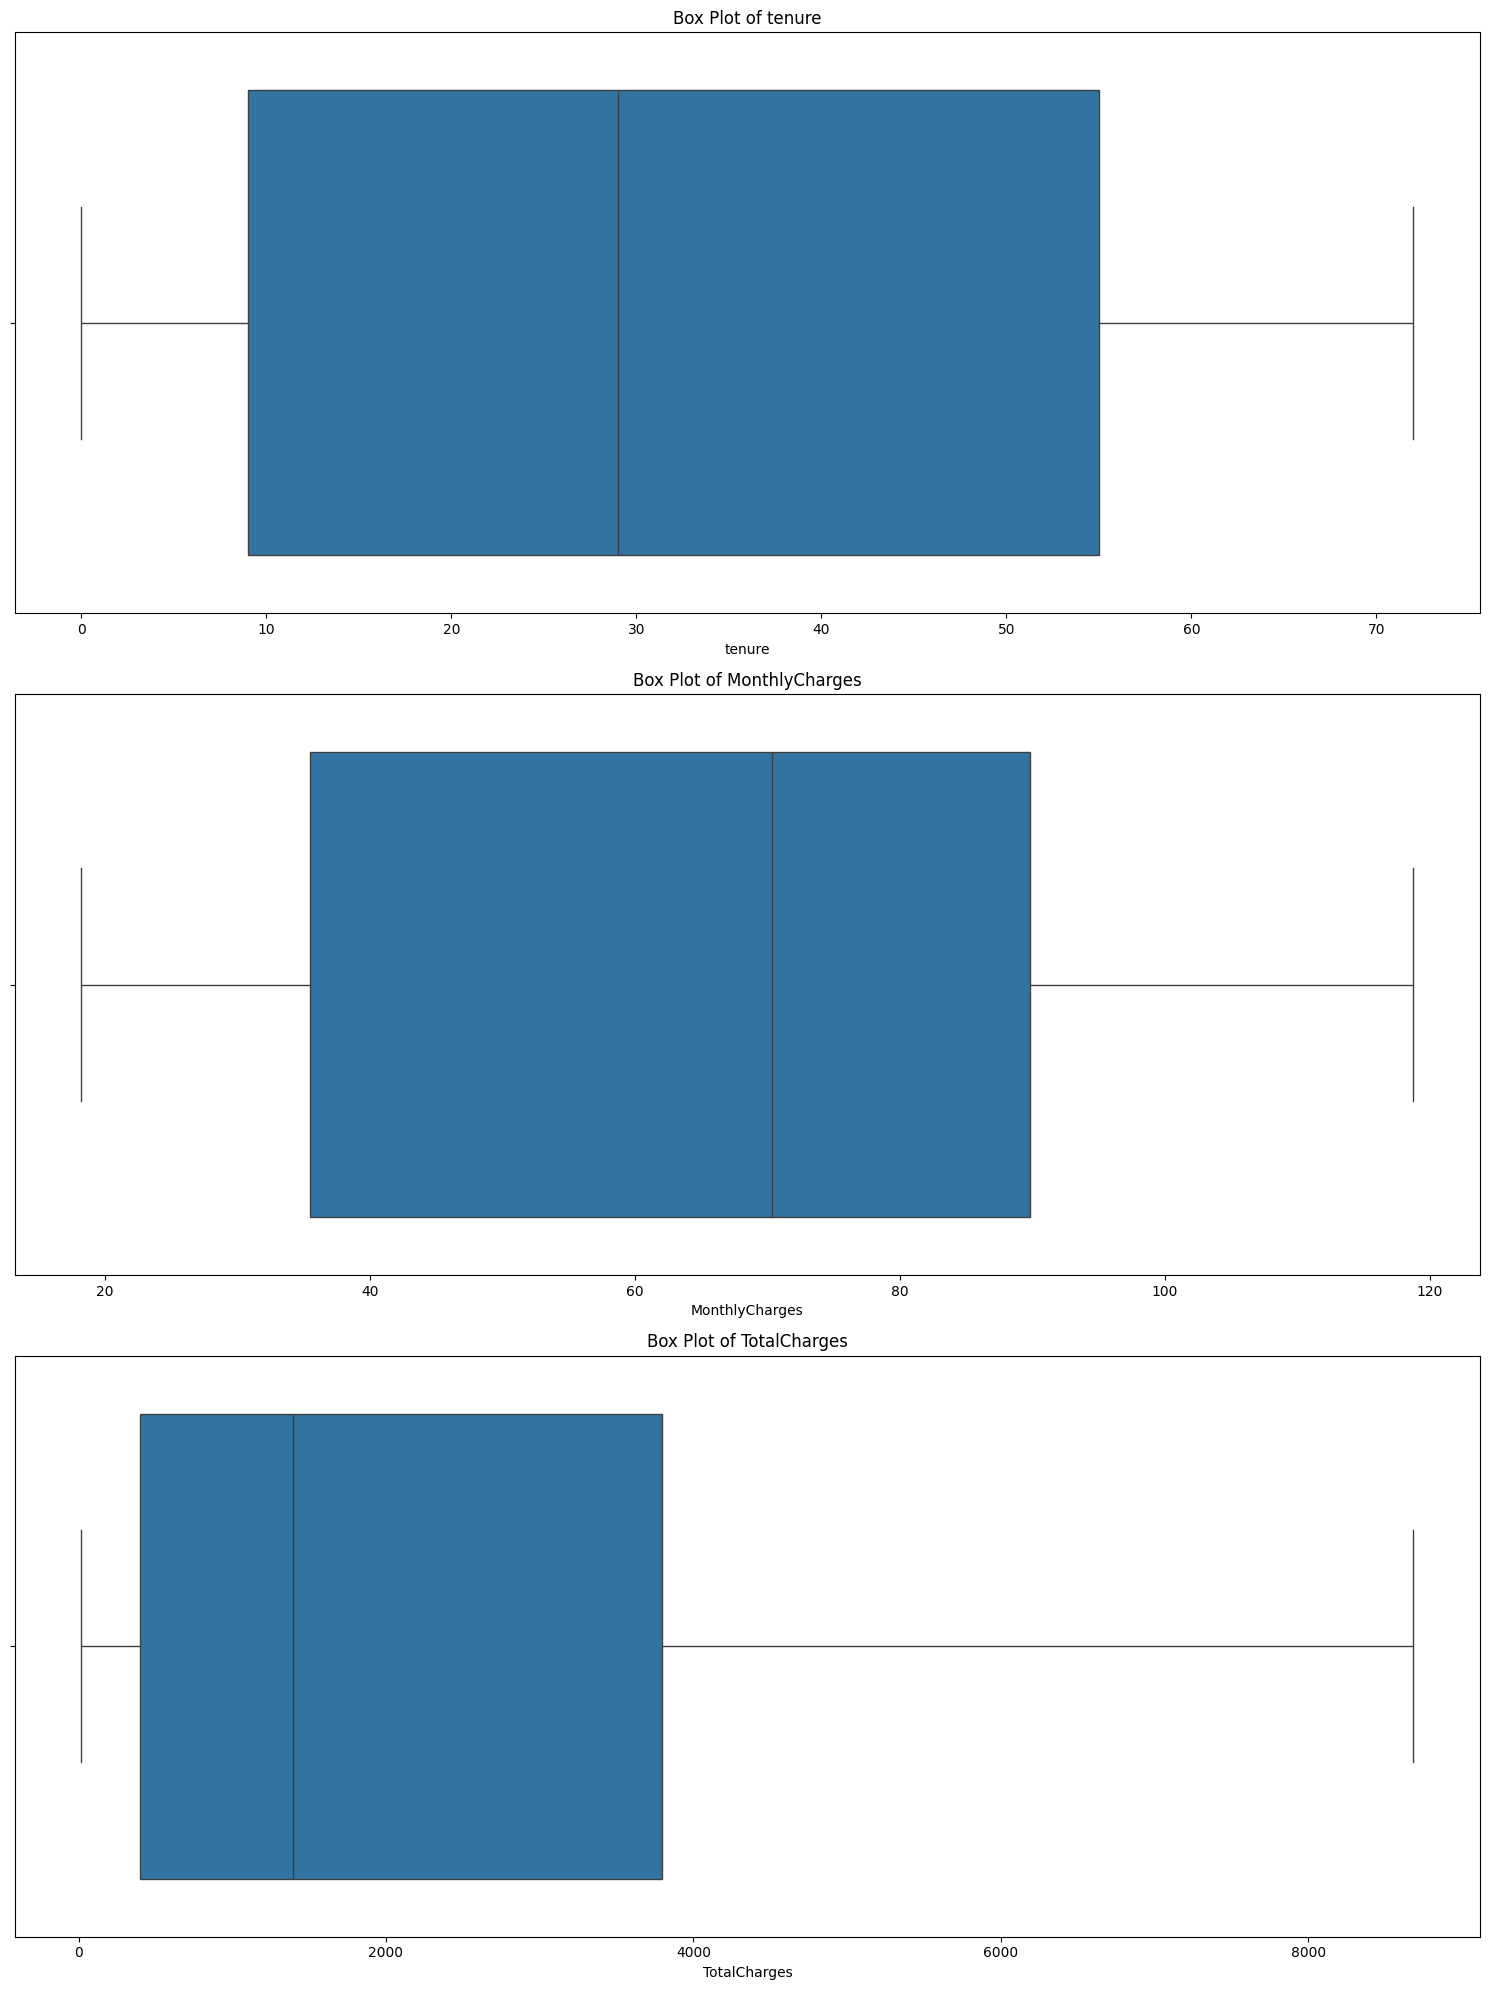

In [127]:
#Outlier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#Convert TotalCharges to numerics (coerce errors to NaN)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

#Select only numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

#Remove customerID and SeniorCitizen
numerical_cols = numerical_cols.drop(['customerID', 'SeniorCitizen'], errors='ignore')

#Create a large figure to hold all boxplots
plt.figure(figsize=(15, 20))
#Loop through each numerical column
for i, col in enumerate(numerical_cols, 1):
    #Create a subplot for each feature
    plt.subplot(len(numerical_cols), 1, i)
    #Boxplot for the current numerical column
    sns.boxplot(x=df[col])
    #Title for each subplot
    plt.title(f'Box Plot of {col}')
#Adjust layout to prevent overlap
plt.tight_layout()
#Display all the Boxplots
plt.show()

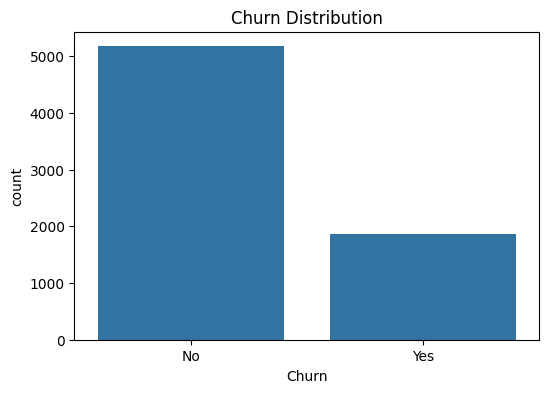

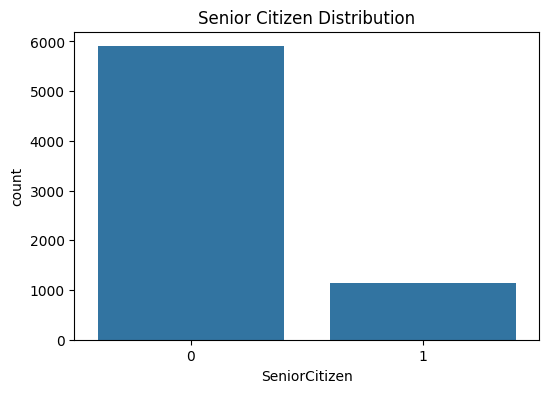

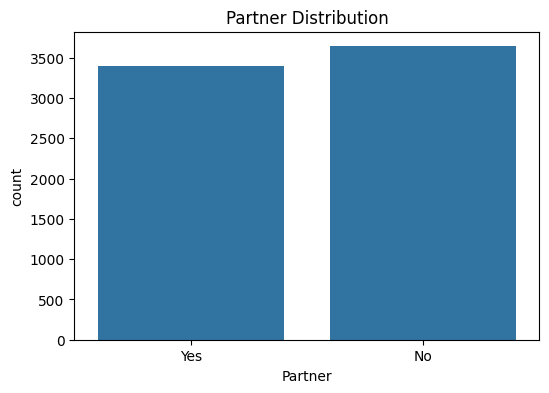

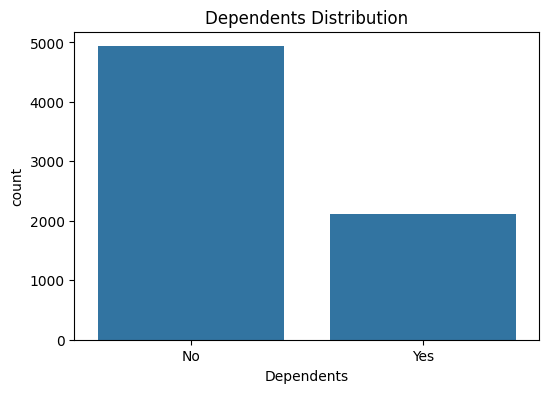

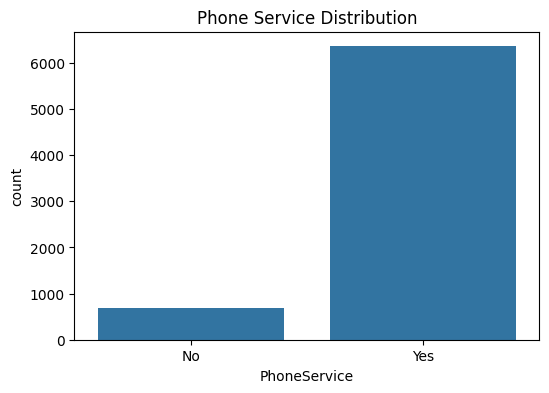

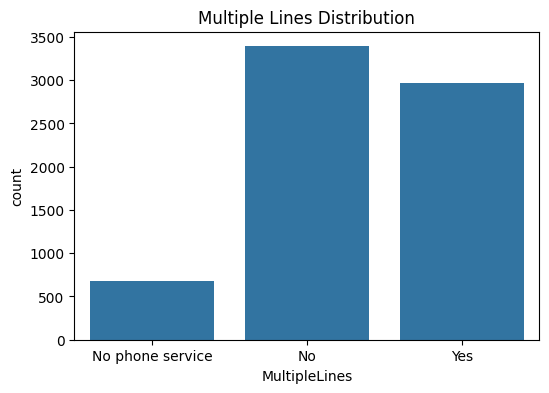

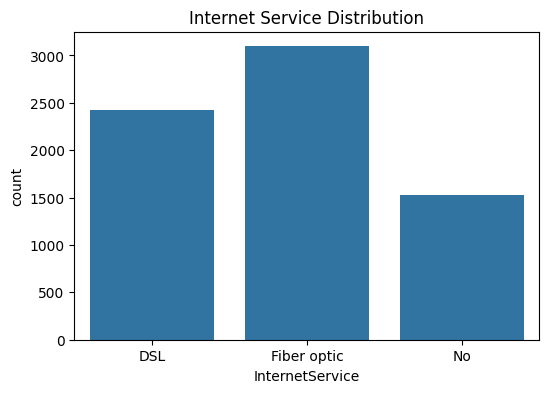

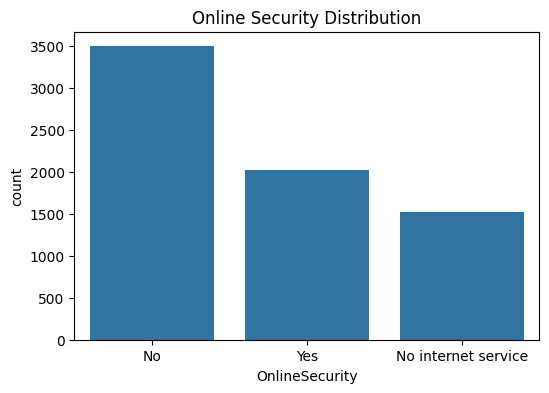

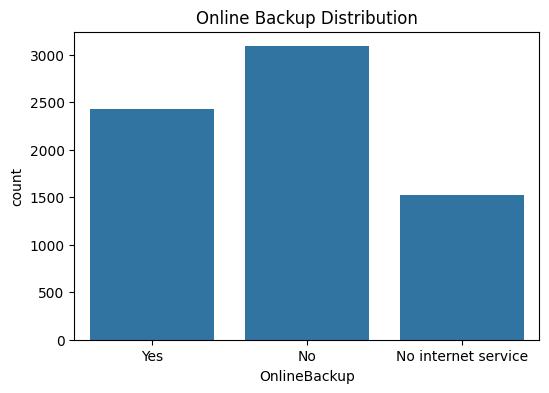

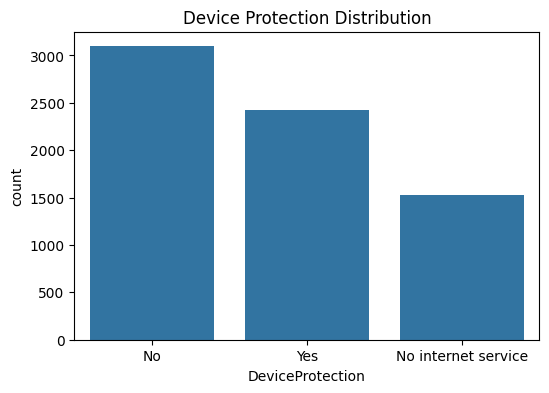

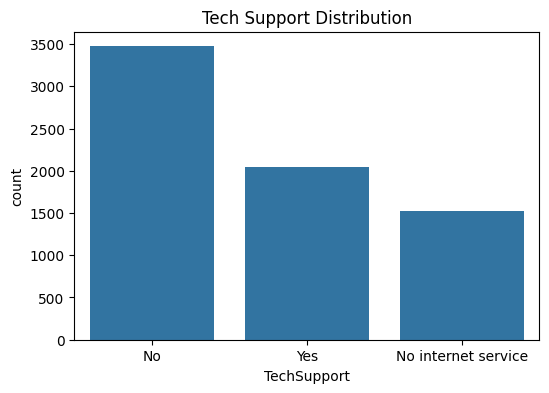

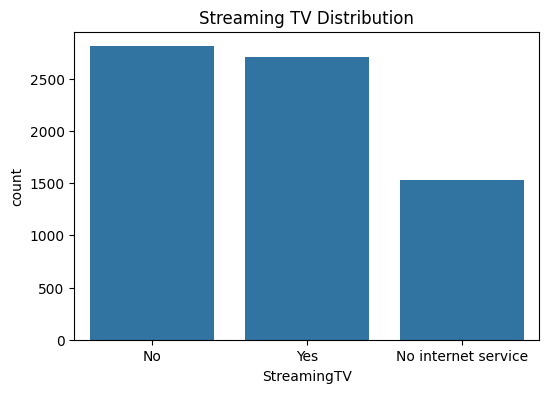

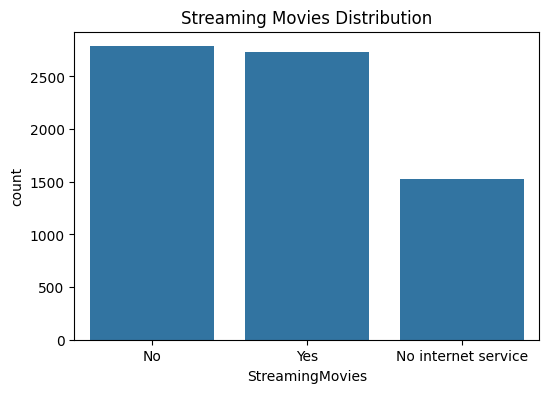

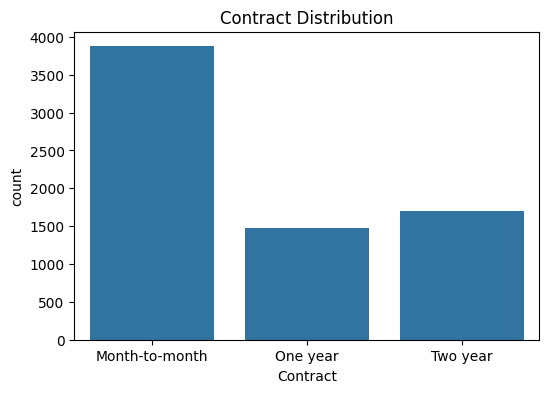

In [128]:
#Plot: Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='SeniorCitizen', data=df)
plt.title('Senior Citizen Distribution')
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='Partner', data=df)
plt.title('Partner Distribution')
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='Dependents', data=df)
plt.title('Dependents Distribution')
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='PhoneService', data=df)
plt.title('Phone Service Distribution')
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='MultipleLines', data=df)
plt.title('Multiple Lines Distribution')
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='InternetService', data=df)
plt.title('Internet Service Distribution')
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='OnlineSecurity', data=df)
plt.title('Online Security Distribution')
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='OnlineBackup', data=df)
plt.title('Online Backup Distribution')
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='DeviceProtection', data=df)
plt.title('Device Protection Distribution')
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='TechSupport', data=df)
plt.title('Tech Support Distribution')
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='StreamingTV', data=df)
plt.title('Streaming TV Distribution')
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='StreamingMovies', data=df)
plt.title('Streaming Movies Distribution')
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='Contract', data=df)
plt.title('Contract Distribution')
plt.show()

In [129]:
#Convert 'TotalCharges' to numeric, coercing errors and filling with NaN with median
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

<function matplotlib.pyplot.show(close=None, block=None)>

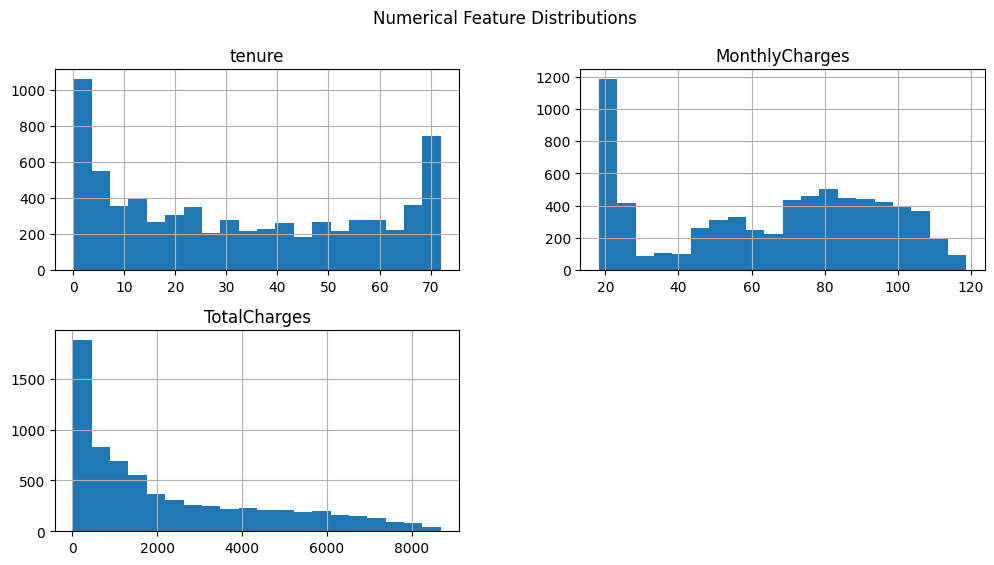

In [130]:
#Numerical Feature Distribution
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
#'.hist(bins=20) - create a histogram with 20 bins (divides the data into 20 ranges for visualization)
df[numerical_features].hist(bins=20, figsize=(12,6))
plt.suptitle('Numerical Feature Distributions')
plt.show

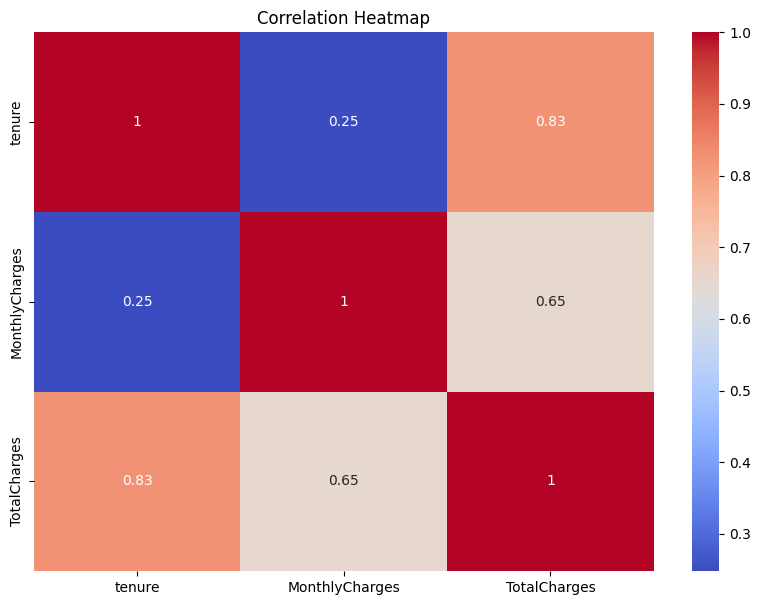

In [131]:
#Correlation Heatmap
plt.figure(figsize=(10,7))

#Compute and plot the correlation matrix as a heatmap
#df[numerical_features].cor() - calculates the pairwise correlation between numerical features
#annot=True - displays the correlation values on the heatmap
#cmap='coolwarm' - sets the color palette from cool (low/negative correlation) to warm (high/positive correlation)
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

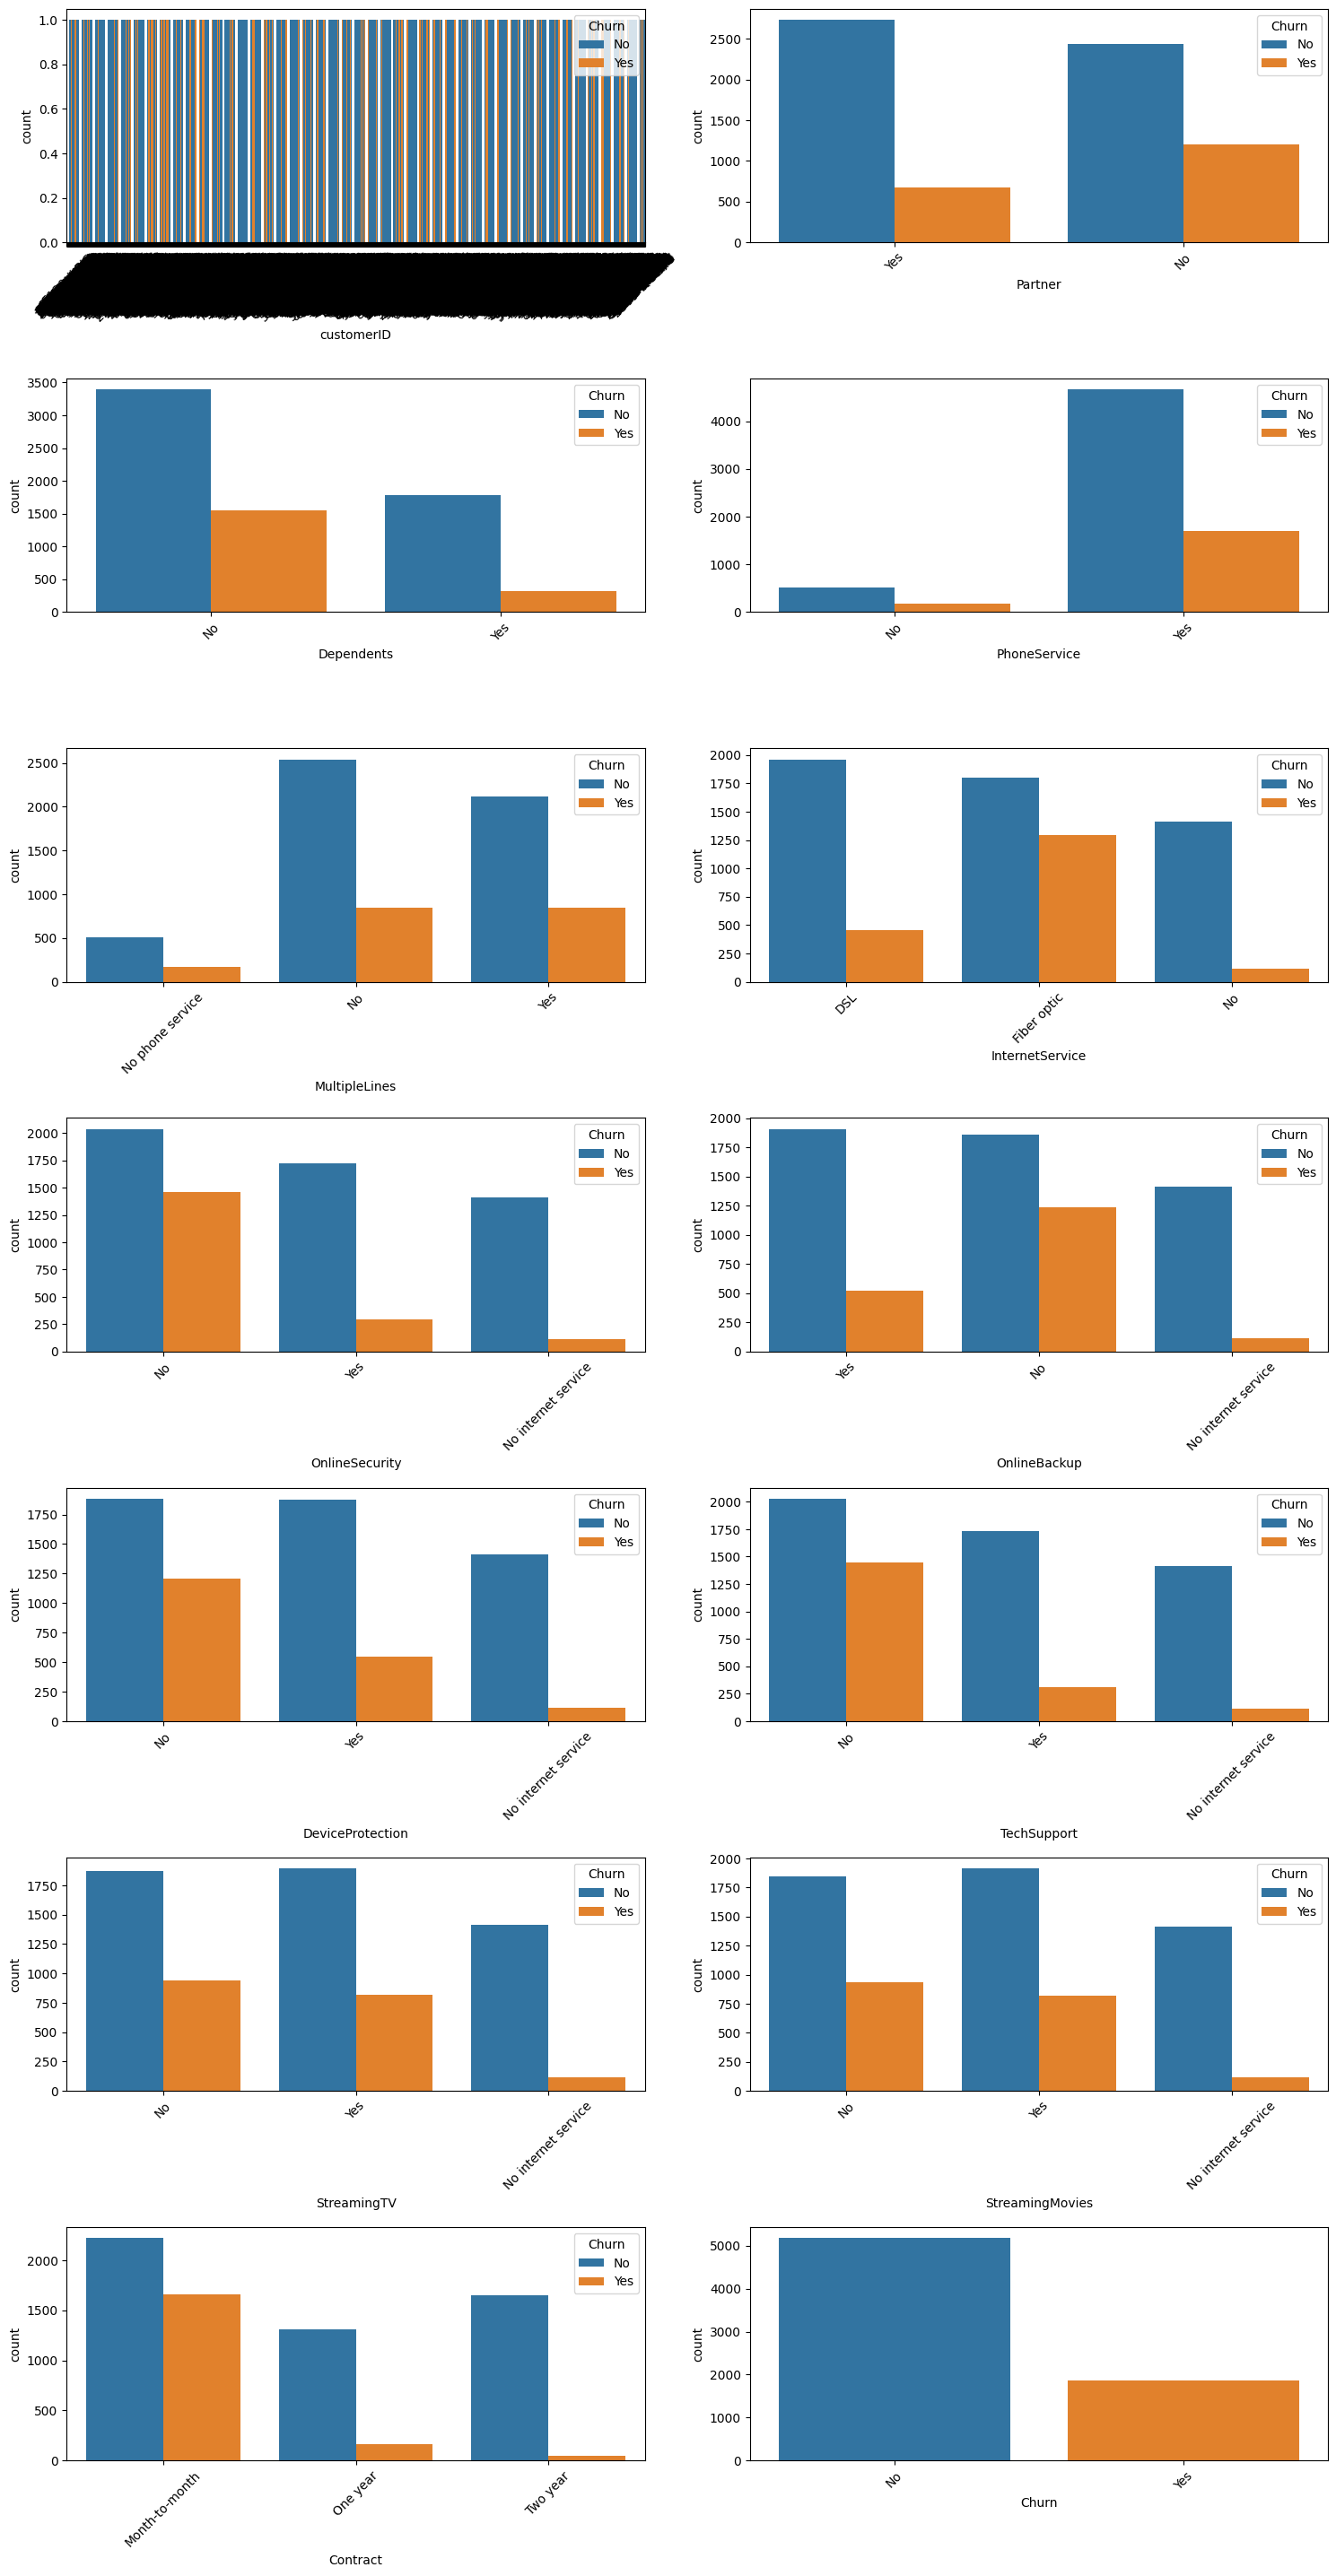

In [132]:
#Categorical feature distribution
#Slecting all the categorical columns
cat_cols = df.select_dtypes(include='object').columns
#This is the  overall figure sze for all subplots
plt.figure(figsize=(15,40))
#Looping through each categorical column
for i, col in enumerate(cat_cols):
  #Create a subplot (10 rows, 2 columns, current position i+1)
  plt.subplot(10,2,i+1)
  #Plotting a countplot for the current categorical column
  #hue='Churn' shows Churn distribution within each category
  sns.countplot(x=col, data=df, hue="Churn")
  #Rotate x-axis labbels for better redability
  plt.xticks(rotation=45)
#Adjust layout to prevent overlapping visuals
plt.tight_layout()
#To display all the plots
plt.show()

In [133]:
#Encoding Data
from sklearn import preprocessing

#Partner
le_partner = preprocessing.LabelEncoder()
if df['Partner'].dtype == 'object':
   le_partner.fit(['Yes','No'])
   df['Partner'] = le_partner.transform(df['Partner'])
   #Yes = 1, No = 0

#Dependents
le_dependents = preprocessing.LabelEncoder()
if df['Dependents'].dtype == 'object':
   le_dependents.fit(['Yes','No'])
   df['Dependents'] = le_dependents.transform(df['Dependents'])
   #Yes = 1, No = 0

#PhoneService
le_phoneService = preprocessing.LabelEncoder()
if df['PhoneService'].dtype == 'object':
   le_phoneService.fit(['Yes','No'])
   df['PhoneService'] = le_phoneService.transform(df['PhoneService'])
   #Yes = 1, No = 0

#MultipleLines
le_multipleLines = preprocessing.LabelEncoder()
if df['MultipleLines'].dtype == 'object':
   le_multipleLines.fit(['Yes','No','No phone service'])
   df['MultipleLines'] = le_multipleLines.transform(df['MultipleLines'])
   #Yes = 2, No = 1, No phone service = 0

#InternetService
le_internetService = preprocessing.LabelEncoder()
if df['InternetService'].dtype == 'object':
   le_internetService.fit(['DSL','Fiber optic','No'])
   df['InternetService'] = le_internetService.transform(df['InternetService'])
   #DSL = 0, Fibre Optic = 1, No = 2

#OnlineSecurity
le_onlineSecurity = preprocessing.LabelEncoder()
if df['OnlineSecurity'].dtype == 'object':
   le_onlineSecurity.fit(['Yes','No','No internet service'])
   df['OnlineSecurity'] = le_onlineSecurity.transform(df['OnlineSecurity'])
   #No = 0, Yes = 2, No internet service = 1

#OnlineBackup
le_onlineBackup = preprocessing.LabelEncoder()
if df['OnlineBackup'].dtype == 'object':
   le_onlineBackup.fit(['Yes','No','No internet service'])
   df['OnlineBackup'] = le_onlineBackup.transform(df['OnlineBackup'])
   #No = 0, Yes = 2, No internet service = 1

#DeviceProtection
le_deviceProtection = preprocessing.LabelEncoder()
if df['DeviceProtection'].dtype == 'object':
   le_deviceProtection.fit(['Yes','No','No internet service'])
   df['DeviceProtection'] = le_deviceProtection.transform(df['DeviceProtection'])
   #No = 0, Yes = 2, No internet service = 1

#TechSupport
le_techSupport = preprocessing.LabelEncoder()
if df['TechSupport'].dtype == 'object':
   le_techSupport.fit(['Yes','No','No internet service'])
   df['TechSupport'] = le_techSupport.transform(df['TechSupport'])
   #No = 0, Yes = 2, No internet service = 1

#StreamingTV
le_streamingTV = preprocessing.LabelEncoder()
if df['StreamingTV'].dtype == 'object':
   le_streamingTV.fit(['Yes','No','No internet service'])
   df['StreamingTV'] = le_streamingTV.transform(df['StreamingTV'])
   #No = 0, Yes = 2, No internet service = 1

#StreamingMovies
le_streamingMovies = preprocessing.LabelEncoder()
if df['StreamingMovies'].dtype == 'object':
   le_streamingMovies.fit(['Yes','No','No internet service'])
   df['StreamingMovies'] = le_streamingMovies.transform(df['StreamingMovies'])
   #No = 0, Yes = 2, No internet service = 1

#Contract
le_contract = preprocessing.LabelEncoder()
if df['Contract'].dtype == 'object':
   le_contract.fit(['Month-to-month','One year','Two year'])
   df['Contract'] = le_contract.transform(df['Contract'])
   #Month-to-month = 0, One year = 1, Two year = 2

#Churn
le_churn = preprocessing.LabelEncoder()
if df['Churn'].dtype == 'object':
   le_churn.fit(['Yes','No'])
   df['Churn'] = le_churn.transform(df['Churn'])
   #Yes = 1, No = 0

In [134]:
df.head(5)

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,1,0,1,0,1,0,0,2,0,0,0,0,0,29.85,29.85,0
1,5575-GNVDE,0,0,0,34,1,0,0,2,0,2,0,0,0,1,56.95,1889.50,0
2,3668-QPYBK,0,0,0,2,1,0,0,2,2,0,0,0,0,0,53.85,108.15,1
3,7795-CFOCW,0,0,0,45,0,1,0,2,0,2,2,0,0,1,42.30,1840.75,0
4,9237-HQITU,0,0,0,2,1,0,1,0,0,0,0,0,0,0,70.70,151.65,1


In [135]:
#New Addition: Feature Engineering

#Tenure Groups
df['tenure_group'] = pd.cut(df['tenure'], bins=[0, 12, 24, 48, 72],
                            labels=['0-1 yr', '1-2 yrs', '2-4 yrs', '4-6 yrs'],
                            include_lowest=True)
le_tenure_group = preprocessing.LabelEncoder()
#Converting text to numeric
df['tenure_group'] = le_tenure_group.fit_transform(df['tenure_group'].astype(str))

#Monthly Charges Category
df['monthly_charges_category'] = pd.cut(df['MonthlyCharges'], bins=[0, 35, 70, 200],
                                        labels=['Low', 'Medium', 'High'],
                                        include_lowest=True)
le_monthly_charges_category = preprocessing.LabelEncoder()
#Converting text to numeric
df['monthly_charges_category'] = le_monthly_charges_category.fit_transform(df['monthly_charges_category'].astype(str))

#Total number of services
services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
            'StreamingTV', 'StreamingMovies', 'PhoneService', 'MultipleLines']
#Count how many services each customer is subscribed to by summing
#the number of service columns where the value is grater than 0
df['total_services'] = df[services].apply(lambda row: sum(row > 0), axis=1)

In [136]:
df.head(5)

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn,tenure_group,monthly_charges_category,total_services
0,7590-VHVEG,0,1,0,1,0,1,0,0,2,...,0,0,0,0,29.85,29.85,0,0,1,2
1,5575-GNVDE,0,0,0,34,1,0,0,2,0,...,0,0,0,1,56.95,1889.50,0,2,2,3
2,3668-QPYBK,0,0,0,2,1,0,0,2,2,...,0,0,0,0,53.85,108.15,1,0,2,3
3,7795-CFOCW,0,0,0,45,0,1,0,2,0,...,2,0,0,1,42.30,1840.75,0,2,2,4
4,9237-HQITU,0,0,0,2,1,0,1,0,0,...,0,0,0,0,70.70,151.65,1,0,0,1


In [148]:
#Train_Test_Split
from sklearn.model_selection import train_test_split

X = df.drop(['Churn', 'customerID'], axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [149]:
#Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [150]:
duplicate_rows = df[df.duplicated()]
print(duplicate_rows.shape)

(0, 21)


In [151]:
df.isnull().sum()

,0
customerID,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


**Decision Tree**

In [152]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

DecisionTreeClassifier(random_state=42)

In [154]:
# Define param_grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10]
}

# Initialize DecisionTreeClassifier and GridSearchCV
dt_clf = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=dt_clf,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)
print("Grid search fitting complete.")

Grid search fitting complete.


In [155]:
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

Best parameters found:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10}
Best cross-validation score:  0.7740485830597588


In [156]:
tuned_dt_clf = grid_search.best_estimator_
print("Tuned Decision Tree classifier trained using best parameters:")
print(tuned_dt_clf)

Tuned Decision Tree classifier trained using best parameters:
DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=10,
                       random_state=42)


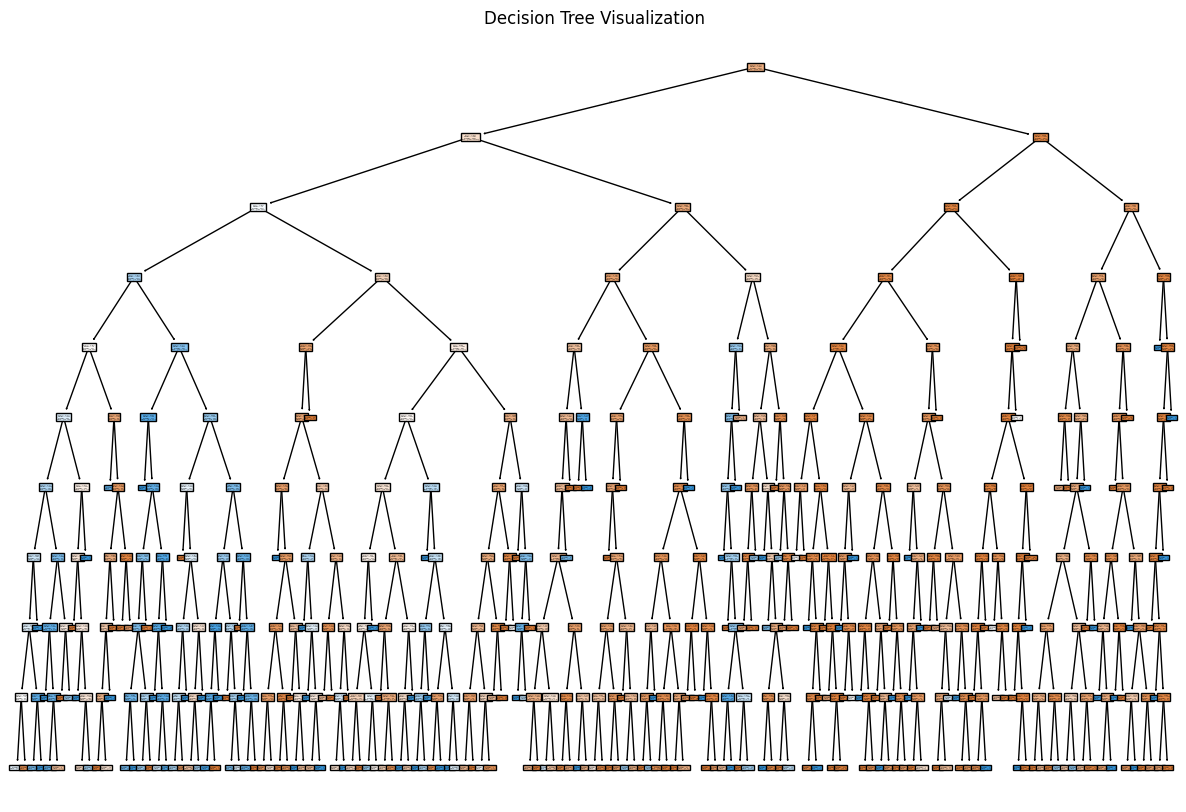

In [157]:
#Visualize Decision Tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
#Filled=true means the decision tree nodes are color-filled
plot_tree(tuned_dt_clf, filled=True)
plt.title("Decision Tree Visualization")
plt.show()

In [158]:
#Evaluation (Test set)
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the test set
tuned_predictions_test = tuned_dt_clf.predict(X_test)

# Calculate and print accuracy
tuned_test_accuracy = accuracy_score(y_test, tuned_predictions_test)
print(f"Tuned Decision Tree Test Accuracy: {tuned_test_accuracy}")

# Generate and print classification report
print("\nClassification Report for Tuned Decision Tree:\n")
print(classification_report(y_test, tuned_predictions_test))

# Generate and print confusion matrix
print("\nConfusion Matrix for Tuned Decision Tree:\n")
print(confusion_matrix(y_test, tuned_predictions_test))

Tuned Decision Tree Test Accuracy: 0.7679205110007097

Classification Report for Tuned Decision Tree:

              precision    recall  f1-score   support

           0       0.82      0.87      0.85      1036
           1       0.58      0.47      0.52       373

    accuracy                           0.77      1409
   macro avg       0.70      0.67      0.68      1409
weighted avg       0.76      0.77      0.76      1409


Confusion Matrix for Tuned Decision Tree:

[[906 130]
 [197 176]]


In [159]:
#Evaluation (Training set)
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the test set
tuned_predictions_train = tuned_dt_clf.predict(X_train)

# Calculate and print accuracy
tuned_train_accuracy = accuracy_score(y_train, tuned_predictions_train)
print(f"Tuned Decision Tree Train Accuracy: {tuned_train_accuracy}")

# Generate and print classification report
print("\nClassification Report for Tuned Decision Tree:\n")
print(classification_report(y_train, tuned_predictions_train))

# Generate and print confusion matrix
print("\nConfusion Matrix for Tuned Decision Tree:\n")
print(confusion_matrix(y_train, tuned_predictions_train))

Tuned Decision Tree Train Accuracy: 0.8409655662051828

Classification Report for Tuned Decision Tree:

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4138
           1       0.75      0.60      0.67      1496

    accuracy                           0.84      5634
   macro avg       0.81      0.77      0.78      5634
weighted avg       0.83      0.84      0.84      5634


Confusion Matrix for Tuned Decision Tree:

[[3834  304]
 [ 592  904]]


**Neural Network**

In [162]:
# Training

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import accuracy_score
import numpy as np

# Early stopping callback to prevent overfitting
early = EarlyStopping(
    monitor='val_loss',       # Validation loss during training
    patience=5,               # Stop if no improvement for 5 epochs
    restore_best_weights=True # Revert to best model weights
)

# Build the model
def build_model(optimizer='adam'):
    nn_model = Sequential()

    # Input layer = 1st hidden layer
    nn_model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
    nn_model.add(Dropout(0.3))  # Drop 30% of neurons to reduce overfitting
    # 2nd Hidden Layer
    nn_model.add(Dense(16, activation='relu'))
    nn_model.add(Dropout(0.2))  # Drop 20% of neurons
    # Output layer (binary classification)
    nn_model.add(Dense(1, activation='sigmoid'))

    # Compile
    nn_model.compile(
        optimizer=optimizer,          # Adaptive optimizer
        loss='binary_crossentropy',   # Loss function for binary classification
        metrics=['accuracy']          # Track accuracy during training
    )
    return nn_model

# Custom wrapper class
class KerasModelWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, optimizer='adam', epochs=50, batch_size=32):
        self.optimizer = optimizer
        self.epochs = epochs
        self.batch_size = batch_size
        self.model_ = None

    def fit(self, X, y):
        self.model_ = build_model(optimizer=self.optimizer)
        self.model_.fit(
            X, y,
            epochs=self.epochs,
            batch_size=self.batch_size,
            validation_split=0.2,
            callbacks=[early],
            verbose=0
        )
        return self

    def predict(self, X):
        y_pred = self.model_.predict(X)
        return (y_pred > 0.5).astype(int).flatten()

    def score(self, X, y):
        y_pred = self.predict(X)
        return accuracy_score(y, y_pred)

# Initialize wrapper
nn_clf = KerasModelWrapper()

# Hyperparameter Grid
param_grid = {
    'optimizer': ['adam', 'rmsprop'],
    'batch_size': [16, 32],
    'epochs': [50, 100]
}

# Grid Search
grid_search = GridSearchCV(
    estimator=nn_clf,
    param_grid=param_grid,
    cv=3,       # 3-fold cross-validation
    verbose=1
)

# Run Grid Search
grid = grid_search.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best Parameters: {'batch_size': 32, 'epochs': 100, 'optimizer': 'adam'}
Best Accuracy: 0.7917997870074546


In [165]:
# NN Test Accuracy

# Get best model from GridSearch
best_nn_model = grid_search.best_estimator_.model_

# Make predictions on the test set
nn_predictions_test = best_nn_model.predict(X_test)
nn_predictions_test = (nn_predictions_test > 0.5).astype(int)

# Compute accuracy
nn_test_accuracy = accuracy_score(y_test, nn_predictions_test)
print(f"Tuned NN Test Accuracy: {nn_test_accuracy}")

45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
Tuned NN Test Accuracy: 0.8069552874378992


In [166]:
# NN Train Accuracy

# Get best model from GridSearch
best_nn_model = grid_search.best_estimator_.model_

# Make predictions on the test set
nn_predictions_train = best_nn_model.predict(X_train)
nn_predictions_train = (nn_predictions_train > 0.5).astype(int)

# Compute accuracy
nn_train_accuracy = accuracy_score(y_train, nn_predictions_train)
print(f"Tuned NN Train Accuracy: {nn_train_accuracy}")

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Tuned NN Train Accuracy: 0.8040468583599574


In [167]:
#NN Classifiaction Report, Classification Matrix - Test set
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:")
print(classification_report(y_test, nn_predictions_test))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, nn_predictions_test))

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1036
           1       0.66      0.56      0.61       373

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409


Confusion Matrix:
[[927 109]
 [163 210]]


In [168]:
#NN Classification Report, Classification Matrix - Train set
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:")
print(classification_report(y_train, nn_predictions_train))

print("\nConfusion Matrix:")
print(confusion_matrix(y_train, nn_predictions_train))

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      4138
           1       0.66      0.55      0.60      1496

    accuracy                           0.80      5634
   macro avg       0.75      0.72      0.73      5634
weighted avg       0.80      0.80      0.80      5634


Confusion Matrix:
[[3713  425]
 [ 679  817]]


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


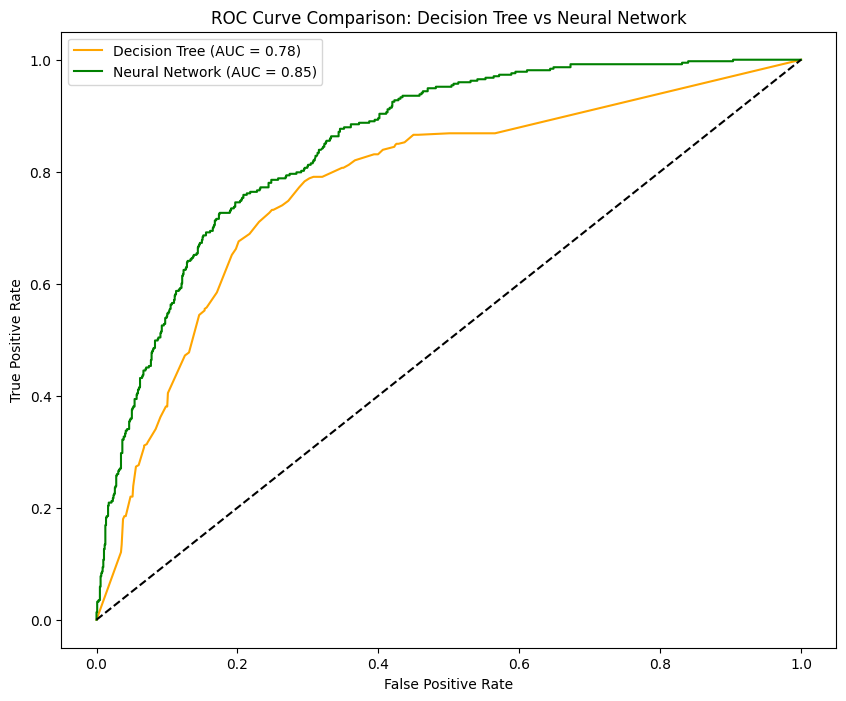

In [169]:
#ROC & AUC Comparison - Neural Network (nn) vs Decision Tree (dt)
from sklearn.metrics import roc_curve, auc

#Decision Tree Probabilities
dt_probs = tuned_dt_clf.predict_proba(X_test)[:,1] #Take probability of the positive class (1)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, dt_probs) #Compute ROC points
auc_score_dt = auc(fpr_dt, tpr_dt) #Compute AUC score

#Neural Network Probabilities
nn_model = grid_search.best_estimator_.model_
nn_probs = best_nn_model.predict(X_test).ravel() #Flattern output (sigmoid gives probabilities)
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, nn_probs) #Compute ROC points
auc_score_nn = auc(fpr_nn, tpr_nn) #Compute AUC score

#Plot both on the graph
plt.figure(figsize=(10,8))
plt.plot(fpr_dt, tpr_dt, color='orange', label=f"Decision Tree (AUC = {auc_score_dt:.2f})")
plt.plot(fpr_nn, tpr_nn, color='green', label=f"Neural Network (AUC = {auc_score_nn:.2f})")

#Diagonal Baseline
plt.plot([0,1], [0,1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison: Decision Tree vs Neural Network')
#Show legend
plt.legend()
#Display the plot
plt.show()

In [170]:
#Model Comparison - Accuracy, Precision, recall, F1
from sklearn.metrics import classification_report

print("----Decision Tree - Test Results ----")
print(classification_report(y_test, tuned_predictions_test))

print("----Neural Network - Test Results ----")
print(classification_report(y_test, nn_predictions_test))

----Decision Tree - Test Results ----
              precision    recall  f1-score   support

           0       0.82      0.87      0.85      1036
           1       0.58      0.47      0.52       373

    accuracy                           0.77      1409
   macro avg       0.70      0.67      0.68      1409
weighted avg       0.76      0.77      0.76      1409

----Neural Network - Test Results ----
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1036
           1       0.66      0.56      0.61       373

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [171]:
#AUC Score Comparison

print("Decision Tree AUC Score:", auc_score_dt)
print("Neural Network AUC Score:", auc_score_nn)

Decision Tree AUC Score: 0.7769558624116266
Neural Network AUC Score: 0.8523463620648608


In [172]:
#Accuracy Comparison Table

comparison_resluts = pd.DataFrame({
    'Model': ['Decision Tree', 'Neural Network'],
    'Train Accuracy': [tuned_train_accuracy, nn_train_accuracy],
    'Test Accuracy': [tuned_test_accuracy, nn_test_accuracy],
    'AUC Score': [auc_score_dt, auc_score_nn]
})

comparison_resluts

,Model,Train Accuracy,Test Accuracy,AUC Score
0,Decision Tree,0.840966,0.767921,0.776956
1,Neural Network,0.804047,0.806955,0.852346


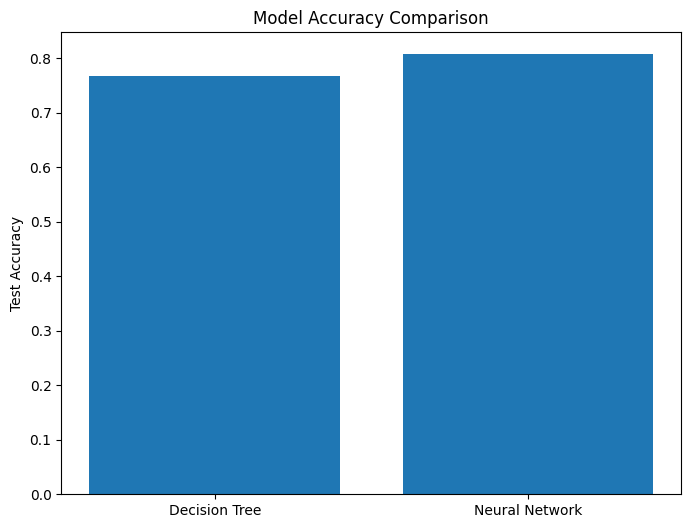

In [173]:
#Model Performance Bar Chart

plt.figure(figsize=(8,6))
plt.bar(['Decision Tree', 'Neural Network'],
        [tuned_test_accuracy, nn_test_accuracy])
plt.ylabel('Test Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()